<a href="https://colab.research.google.com/github/anafer25/simpson-integration-and-error-analysis/blob/main/simpson_integration_and_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

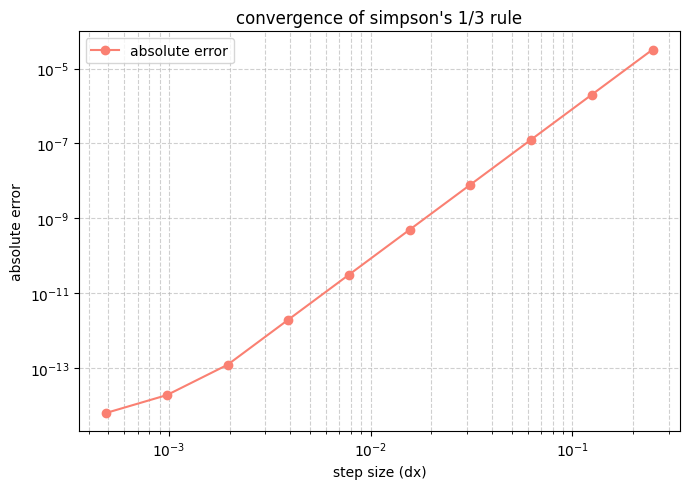

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# numerical integration using simpson's 1/3 rule
def simpson_rule(func, start, end, n_intervals):
    """approximate the integral of func from start to end using n_intervals."""
    dx = (end - start) / n_intervals
    integral = 0.0
    # apply simpson's weights 1,4,1 over each subinterval
    for i in range(n_intervals):
        x_left = start + i * dx
        x_mid  = x_left + 0.5 * dx
        x_right= x_left + dx
        integral += func(x_left) + 4*func(x_mid) + func(x_right)
    return integral * dx / 6

# define any function to integrate
def my_function(x):
    return x**4

# integration parameters
lower_bound = 1
upper_bound = 2
initial_intervals = 4
num_evaluations = 10
exact_integral = 31 / 5  # known exact result for f(x)=x^4 over [1,2]

# store step sizes and corresponding errors
step_sizes = []
error_values = []

current_intervals = initial_intervals
for _ in range(num_evaluations):
    dx = (upper_bound - lower_bound) / current_intervals
    step_sizes.append(dx)
    approx = simpson_rule(my_function, lower_bound, upper_bound, current_intervals)
    error_values.append(abs(approx - exact_integral))
    current_intervals *= 2  # refine by doubling intervals

# convert to numpy arrays for plotting
step_sizes = np.array(step_sizes)
error_values = np.array(error_values)

# plot convergence on a log-log scale
plt.figure(figsize=(7,5))
plt.plot(step_sizes, error_values, 'o-', color='salmon', label='absolute error')
plt.xlabel('step size (dx)')
plt.ylabel('absolute error')
plt.title('convergence of simpson\'s 1/3 rule')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
